# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

### Team Members: Davis Townsend, Zack Bilderback

# Question 1 - Stochastic Gradient Descent (10pts)

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.

### 1)

We use the following rule to update weights where, $w_{j}$ is the weight, $\eta$ is the learning rate, $\Delta w_{j} = \frac {\delta E_{n}}{\delta w_{j}}$ and $E_{n}$ is our cost function.
$$w_{j} = w_{j} - \eta\Delta w_{j} $$ 

---

$Y$ is:

 
$$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_2$$


Let $t_{n}$ be a test data point.

We can rewrite our cost function, $E_{n}$ as:

$$ E_{n} = (t_{n} - y_{n})^2 $$

Our coefficient update, $\Delta w$, is the partial derivative $\frac {\delta E_{n}}{\delta w_{j}}$. Using the chain rule and including $\eta$, we get:

$$\frac {\delta E_{n}}{\delta w_{0}} = -2\eta* (t_{n} - y_{n}) $$

$$\frac {\delta E_{n}}{\delta w_{1}} = -2\eta * x_{1}(t_{n} - y_{n}) $$

$$\frac {\delta E_{n}}{\delta w_{2}} = -2\eta * x_{1}^2(t_{n} - y_{n}) $$

$$\frac {\delta E_{n}}{\delta w_{3}} = -2\eta * x_{2}(t_{n} - y_{n}) $$

Thus, our final weight updates are:

$$ w_{0} = w_{0} + 2\eta* (t_{n} - y_{n}) $$
$$ w_{1} = w_{1} + 2\eta * x_{1}(t_{n} - y_{n})$$
$$ w_{2} = w_{2} + 2\eta * x_{1}^2(t_{n} - y_{n}) $$
$$ w_{3} = w_{3} + 2\eta * x_{2}(t_{n} - y_{n}) $$


### 2)

In [52]:
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class StochasticGradientDescent:
    
    def __init__(self, learning_rate, num_iters):
        '''Allows user to import the desired learning rate and number of iterations/epochs'''
        self.learning_rate = learning_rate
        self.num_iters = num_iters
    
    def fit(self, X, y):
        '''Takes an array of x values, an array of the corresponding y values, a learning rate, and the number of iterations and 
            outputs a list of weights that have been optimized using stochastic gradient descent'''

        # Initialize coefficients
        weights = np.array([0]*4)
        w0 = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        w3 = weights[3]
        
        # Iterate through data set the number of times specified in input
        for epoch in range(self.num_iters):
            
            # Randomize order of data points before each epoch
            X_train, y_train = shuffle(X,y)
            
            # Iterate through each data point, updating the coefficients each time
            for i in range(len(X)):
                temp_x1 = X_train[i][0]
                temp_x2 = X_train[i][1]
                temp_y = y_train[i]
                alpha = self.learning_rate
                
                # Update coefficients
                temp_yhat = w0 + (w1*temp_x1) + (w2*temp_x1**2) + (w3*temp_x2)
                w0 = w0 - (temp_yhat - temp_y)*alpha
                w1 = w1 - (temp_yhat - temp_y)*temp_x1*alpha
                w2 = w2 - (temp_yhat - temp_y)*(temp_x1**2)*alpha
                w3 = w3 - (temp_yhat - temp_y)*temp_x2*alpha
                weights = [w0, w1, w2, w3]
        
        self.weights = weights

    def predict(self, X):
        '''Uses fitted SGD model to predict values of y for a given X array'''

        # Retrieve weights from fit
        weights = self.weights
        w0 = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        w3 = weights[3]
        
        y_pred = []
        # Make prediction for each sample in X
        for line in X:
            temp_x1 = float(line[0])
            temp_x2 = float(line[1])
            temp_yhat = w0 + (w1*temp_x1) + (w2*temp_x1**2) + (w3*temp_x2)
            # Add prediction to list of predictions
            y_pred.append(temp_yhat)
        
        self.y_pred = y_pred
        return y_pred

Now using SGD class to predict data from samples.csv

In [53]:
# Read in data
samples_df = pd.read_csv('samples.csv')[['x1', 'x2', 'y']]

# Separate data into an X array and y array to input in SGD class
X, y = np.array(samples_df[['x1', 'x2']]), np.array(samples_df['y'])

In [54]:
from sklearn.metrics import mean_squared_error as MSE

# Define paramaters to be examined
## Learning rate
alphas = [0.0001, 0.001, 0.01]
## Number of epochs
num_iters = range(1,11)

# Initialize lists to store MSE and weights after each iteration
## MSE
MSE0001_list = []
MSE001_list = []
MSE01_list = []
## Weights
weights0001_list = []
weights001_list = []
weights01_list = []

# Iterate through epochs, fit SGD, and make predictions for X
for index in num_iters:
    # Learning rate of 0.0001
    fit0001 = StochasticGradientDescent(alphas[0], index)
    fit0001.fit(X, y)
    predict0001 = fit0001.predict(X)
    
    # Learning rate of 0.001
    fit001 = StochasticGradientDescent(alphas[1], index) 
    fit001.fit(X, y)
    predict001 = fit001.predict(X)
    
    # Learning rate of 0.01
    fit01 = StochasticGradientDescent(alphas[2], index) 
    fit01.fit(X, y)
    predict01 = fit01.predict(X)
    
    # Append weights for each model to lists
    weights0001_list.append(fit0001.weights)
    weights001_list.append(fit001.weights)
    weights01_list.append(fit01.weights)
    
    # Calculate MSE for each model and append to lists
    MSE0001_list.append(MSE(y, predict0001))
    MSE001_list.append(MSE(y, predict001))
    MSE01_list.append(MSE(y, predict01))

# Convert weights lists to arrays
weights0001_array = np.array(weights0001_list)
weights001_array = np.array(weights001_list)
weights01_array = np.array(weights01_list)

([<matplotlib.axis.XTick at 0x172c8cc0>,
 <a list of 12 Text xticklabel objects>)

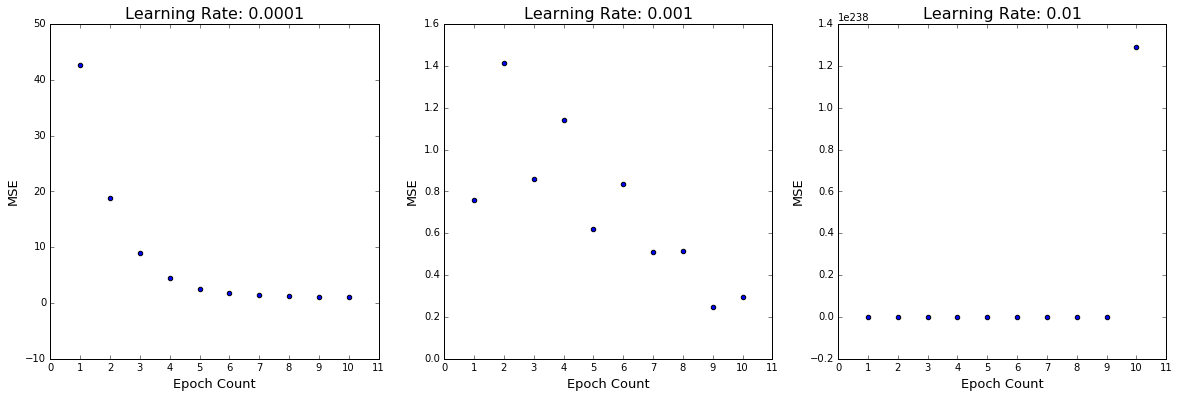

In [55]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# Plot MSE as a function of epoch count for each model 
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.scatter(num_iters, MSE0001_list)
plt.title('Learning Rate: 0.0001', fontsize = 16)
plt.xlabel('Epoch Count', fontsize = 13)
plt.ylabel('MSE', fontsize = 13)
plt.xlim(0,11)
plt.xticks(x)

plt.subplot(132)
plt.scatter(num_iters, MSE001_list)
plt.title('Learning Rate: 0.001', fontsize = 16)
plt.xlabel('Epoch Count', fontsize = 13)
plt.ylabel('MSE', fontsize = 13)
plt.xlim(0,11)
plt.xticks(x)

plt.subplot(133)
plt.scatter(num_iters, MSE01_list)
plt.title('Learning Rate: 0.01', fontsize = 16)
plt.xlabel('Epoch Count', fontsize = 13)
plt.ylabel('MSE', fontsize = 13)
plt.xlim(0,11)
plt.xticks(x)

In [56]:
# Create dataframes out weight arrays for easier plotting 
df_weights0001 = pd.DataFrame(weights0001_array)
df_weights0001.columns = ['w0', 'w1', 'w2', 'w3']

df_weights001 = pd.DataFrame(weights001_array)
df_weights001.columns = ['w0', 'w1', 'w2', 'w3']

df_weights01 = pd.DataFrame(weights01_array)
df_weights01.columns = ['w0', 'w1', 'w2', 'w3']

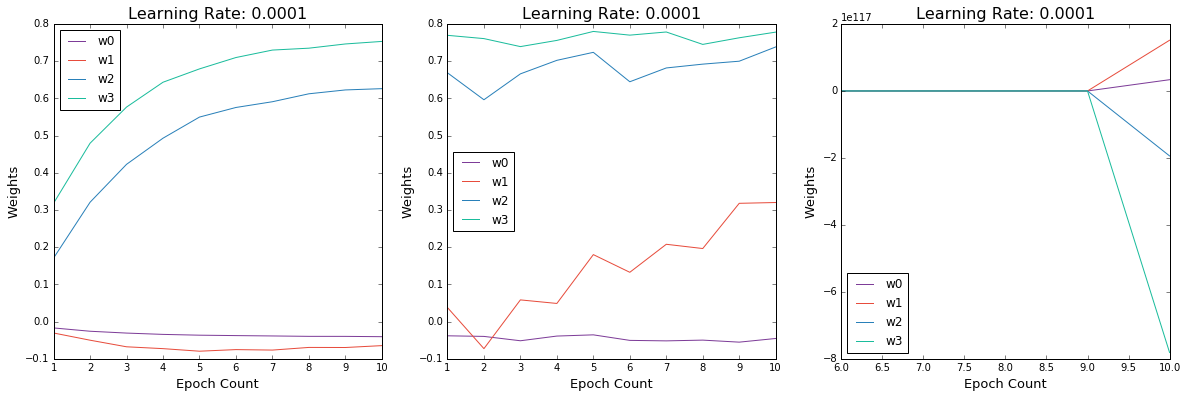

In [57]:
epochs = range(1,11)

# Plot weights as a function of epoch count for each model
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.plot(epochs, df_weights0001['w0'], color = '#7D3C98')
plt.plot(epochs, df_weights0001['w1'], color = '#E74C3C')
plt.plot(epochs, df_weights0001['w2'], color = '#2980B9')
plt.plot(epochs, df_weights0001['w3'], color = '#1ABC9C')
plt.xlabel('Epoch Count', fontsize = 13)
plt.ylabel('Weights', fontsize = 13)
plt.title('Learning Rate: 0.0001', fontsize = 16)
plt.legend(loc = 'best')

plt.subplot(132)
plt.plot(epochs, df_weights001['w0'], color = '#7D3C98')
plt.plot(epochs, df_weights001['w1'], color = '#E74C3C')
plt.plot(epochs, df_weights001['w2'], color = '#2980B9')
plt.plot(epochs, df_weights001['w3'], color = '#1ABC9C')
plt.xlabel('Epoch Count', fontsize = 13)
plt.ylabel('Weights', fontsize = 13)
plt.title('Learning Rate: 0.0001', fontsize = 16)
plt.legend(loc = 'best')

plt.subplot(133)
plt.xlim(6,10)
plt.plot(epochs, df_weights01['w0'], color = '#7D3C98')
plt.plot(epochs, df_weights01['w1'], color = '#E74C3C')
plt.plot(epochs, df_weights01['w2'], color = '#2980B9')
plt.plot(epochs, df_weights01['w3'], color = '#1ABC9C')
plt.xlabel('Epoch Count', fontsize = 13)
plt.ylabel('Weights', fontsize = 13)
plt.title('Learning Rate: 0.0001', fontsize = 16)
plt.legend(loc = 'best')

# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?

<img src="sgd.png">

### Answer

Gradient descent minimizes the associated cost function by iteratively updating the coefficients of said function. The formula that is used to update the coefficient $w$ is shown below, where $w$ represents the coefficient that is being updated, $\alpha$ represents the learning rate, and $J(w)$ represents the cost function.:

$$ w = w - \alpha*\frac{\partial}{\partial w}J(w) $$

If we take the derivative of the cost function, then the change in the coefficient is directly proportional to the change in the coefficient. So starting between B and C, the derivative of the cost function with respect to $w$ is zero, i.e. the slope is zero which means the second term in the above function is zero, and $w$ remains unchanged. This holds for any number of iterations thus we will NOT be able to find the local minima.

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

(263, 16)


C:\Users\zack_\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

Prepare MSE scoring variable, MLP's for diff hidden layer sizes and train/test data by scaling them

In [59]:
#first we scale our x variables
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
MLPA = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (2,), solver ='sgd', learning_rate = 'constant', random_state = 42, batch_size = 40, 
                  learning_rate_init = 0.001)
MLPB = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (15,), solver ='sgd', learning_rate = 'constant', random_state = 42, batch_size = 40, 
                  learning_rate_init = 0.001)
mse = make_scorer(mean_squared_error)

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

# 1)

In [60]:
#A
score = cross_val_score(MLPA, X_train, y_train, cv = 5, scoring = mse)
print 'rmse A:', np.sqrt(score)
M = sum(np.sqrt(score))
print "AVG RMSE A:", M/5

#B
score = cross_val_score(MLPB, X_train, y_train, cv = 5, scoring = mse)
print 'rmse B:', np.sqrt(score)
M = sum(np.sqrt(score))
print "AVG RMSE B:", M/5

rmse A: [ 307.50792543  546.87974159  439.93924147  420.0741545   334.53974802]
AVG RMSE A: 409.788162201
rmse B: [ 286.84504868  416.45656003  312.06216944  299.24343233  239.73039363]
AVG RMSE B: 310.867520821


We see that the model with the higher hidden layer size has the MSE decrease which makes sense itnuitively as more complex models generally decrease MSE but can start to overfit at some point

# 2)

We see that for both models the RMSE goes down when the the hidden layer sizes increase, meaning that model B is better and of course the RMSE increases when going from the training to the test data.
However, the avg RMSE from part 1 and model B was lower than the RMSE for any of the models trained on the entire dataset

In [61]:
#getting training RMSe
trainmodelA = MLPA.fit(X_train, y_train)
trainmodelB = MLPB.fit(X_train, y_train)
pred_Ya = trainmodelA.predict(X_train)
pred_Yb = trainmodelB.predict(X_train)
scoreA = mean_squared_error(y_train, pred_Ya)
scoreB = mean_squared_error(y_train, pred_Yb)
print 'RMSE on training data for part A:', np.sqrt(scoreA)
print 'RMSE on training data for part B:', np.sqrt(scoreB)

#getting testing RMSE
testmodelA = MLPA.fit(X_train, y_train)
testmodelB = MLPB.fit(X_train, y_train)
pred_Ya = trainmodelA.predict(X_test)
pred_Yb = trainmodelB.predict(X_test)
scoreA = mean_squared_error(y_test, pred_Ya)
scoreB = mean_squared_error(y_test, pred_Yb)
print 'RMSE on test data for part A:', np.sqrt(scoreA)
print 'RMSE on test data for part B:', np.sqrt(scoreB)

RMSE on training data for part A: 364.368091219
RMSE on training data for part B: 300.095370331
RMSE on test data for part A: 486.722986238
RMSE on test data for part B: 412.637972754


# 3)

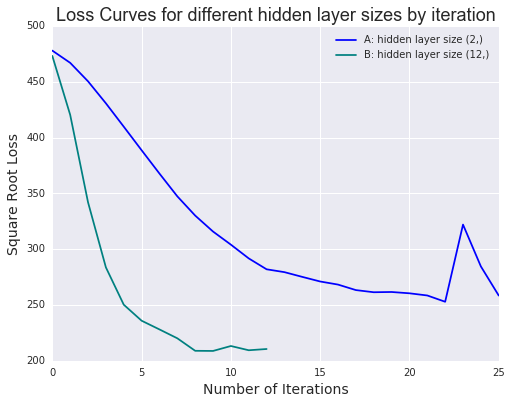

In [62]:
import seaborn

Acurve = np.sqrt(testmodelA.loss_curve_)
Bcurve = np.sqrt(testmodelB.loss_curve_)

plt.figure(figsize=(8,6))

plt.plot(Acurve, color='blue', label = 'A: hidden layer size (2,)')
plt.plot(Bcurve, color='teal', label = 'B: hidden layer size (12,)')
plt.ylabel('Square Root Loss', fontsize = 14)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.title('Loss Curves for different hidden layer sizes by iteration', fontsize = 18)
plt.legend(loc='upper right')
plt.show()

# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

## Data Prep

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])
newdata = pd.get_dummies(data)
df = newdata.drop('Direction_Down', 1)
train = df.ix[199:1199]
test = df.ix[1200:]
train_X = train[[0,1,2,3,4]] 
train_X = train_X.values
train_y = train[[5]]
train_y = train_y.values
test_X = test[[0,1,2,3,4]]
test_X = test_X.values
test_y = test[[5]]
test_y = test_y.values
NB = GaussianNB()
LD = LDA(solver='lsqr',shrinkage = 'auto')
QD = QDA()
Roc = roc_curve
Roc_score = roc_auc_score

Here we created a function to return the extracted probabilites for each type of model

In [65]:
def BayesianClassifier(modeltype, train_X, train_y, test_X):
    
    '''takes bayesian models of Linear/Quadratic Discriminant Analysis, Gaussian Naiive Bayes
    and return an array of predicted probabilities as an array
    
        Note: data must be in an array   '''
    
    fitted_model = modeltype.fit(train_X, train_y)
    predicted_y = modeltype.predict(test_X)
    predicted_probabilities = modeltype.predict_proba(test_X)
    return predicted_probabilities

In [66]:
predictedprobsQD = BayesianClassifier(QD, train_X, train_y, test_X)
predictedprobsNB = BayesianClassifier(NB, train_X, train_y, test_X)
predictedprobsLD = BayesianClassifier(LD, train_X, train_y, test_X)

C:\Users\zack_\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Define function to return Roc parameters and AUC score

In [67]:
def RocCurve(predprobs, actual_y):
    '''predicted probabilities should be in form of an array
    
    function returns the fpr, tpr, threshold and the AUC of the ROC Curve as the score1'''
    
    pos_probs = []
    for i in predprobs:
        pos_probs.append(i[1])
    fpr, tpr, threshold = roc_curve(actual_y, pos_probs)
    score = roc_auc_score(actual_y, pos_probs, average = 'weighted')
    return fpr, tpr, threshold, score

Call function to get returned values as useable values for graphing

In [68]:
QDfpr = RocCurve(predictedprobsQD, test_y)[0]
QDtpr = RocCurve(predictedprobsQD, test_y)[1]
QDthresh = RocCurve(predictedprobsQD, test_y)[2]
QDAUCscore = RocCurve(predictedprobsQD, test_y)[3]
NBfpr = RocCurve(predictedprobsNB, test_y)[0]
NBtpr = RocCurve(predictedprobsNB, test_y)[1]
NBthresh = RocCurve(predictedprobsNB, test_y)[2]
NBAUCscore = RocCurve(predictedprobsNB, test_y)[3]
LDfpr = RocCurve(predictedprobsLD, test_y)[0]
LDtpr = RocCurve(predictedprobsLD, test_y)[1]
LDthresh = RocCurve(predictedprobsLD, test_y)[2]
LDAUCscore = RocCurve(predictedprobsLD, test_y)[3]

Now simply graph the different classifiers

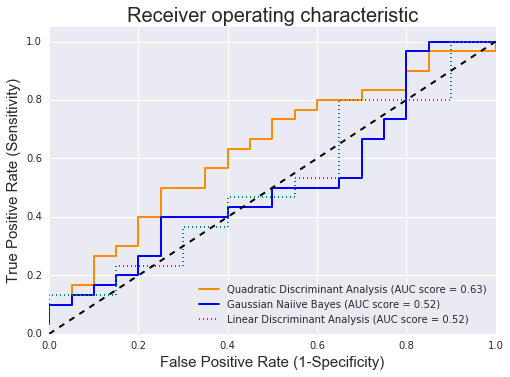

In [69]:
plt.figure()
lw = 2
plt.plot(QDfpr, QDtpr, color='darkorange',
         lw=lw, label='Quadratic Discriminant Analysis (AUC score = %0.2f)' % QDAUCscore)
plt.plot(NBfpr, NBtpr, color='blue',
         lw=lw, label='Gaussian Naiive Bayes (AUC score = %0.2f)' % NBAUCscore)
plt.plot(LDfpr, LDtpr, color='teal',
         lw=lw, linestyle = ':', label='Linear Discriminant Analysis (AUC score = %0.2f)' % LDAUCscore)

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

We see that Quadratic Discriminant Analysis model did the best with the highest AUC score and you see visually that the curve is the closest to the upper left corner. That corner is ideal because there you have the highest sensitivity (correct predictions) and the least false predictions (1-Specificity) or the false positive rate.

NB and LDA only did marginally better than 0.5 which is not good, as this indicates you could do almost as well by random chance of flipping a coin and guessing

## Part 6
#### Now we'll run the same things as before, except now we use only 100 training data points rather than 1000

In [70]:
newtrain = train.ix[1099:]
train_X100 = newtrain[[0,1,2,3,4]] 
train_X100 = train_X100.values
train_y100 = newtrain[[5]]
train_y100 = train_y100.values

In [71]:
predictedprobsQD = BayesianClassifier(QD, train_X100, train_y100, test_X)
predictedprobsNB = BayesianClassifier(NB, train_X100, train_y100, test_X)
predictedprobsLD = BayesianClassifier(LD, train_X100, train_y100, test_X)

QDfpr = RocCurve(predictedprobsQD, test_y)[0]
QDtpr = RocCurve(predictedprobsQD, test_y)[1]
QDthresh = RocCurve(predictedprobsQD, test_y)[2]
QDAUCscore = RocCurve(predictedprobsQD, test_y)[3]
NBfpr = RocCurve(predictedprobsNB, test_y)[0]
NBtpr = RocCurve(predictedprobsNB, test_y)[1]
NBthresh = RocCurve(predictedprobsNB, test_y)[2]
NBAUCscore = RocCurve(predictedprobsNB, test_y)[3]
LDfpr = RocCurve(predictedprobsLD, test_y)[0]
LDtpr = RocCurve(predictedprobsLD, test_y)[1]
LDthresh = RocCurve(predictedprobsLD, test_y)[2]
LDAUCscore = RocCurve(predictedprobsLD, test_y)[3]

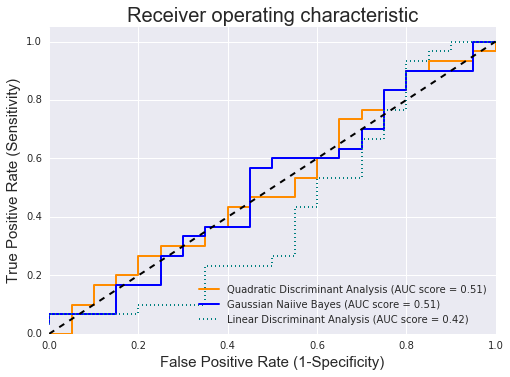

In [72]:
plt.figure()
lw = 2
plt.plot(QDfpr, QDtpr, color='darkorange',
         lw=lw, label='Quadratic Discriminant Analysis (AUC score = %0.2f)' % QDAUCscore)
plt.plot(NBfpr, NBtpr, color='blue',
         lw=lw, label='Gaussian Naiive Bayes (AUC score = %0.2f)' % NBAUCscore)
plt.plot(LDfpr, LDtpr, color='teal',
         lw=lw, linestyle = ':', label='Linear Discriminant Analysis (AUC score = %0.2f)' % LDAUCscore)

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

We see that when we only have the last 100 data points none of our models do better than random chance (.5), and LDA even did worse at .42 than just not having a model at all

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Following code will load and clean the dataset and load some useful functions

In [73]:
import pandas as pd
import numpy as np

from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import (train_test_split,KFold)
%pylab inline

Auto = pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
Auto.head(5)

Populating the interactive namespace from numpy and matplotlib


C:\Users\zack_\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
`%matplotlib` prevents importing * from pylab and numpy


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


### 1)
Here I'm just creating the new mpg01 column

In [74]:
Autonew = Auto
median = Autonew['mpg'].median()
mask = Autonew['mpg']  > median
mpg01 = []
for i in mask:
    if i == False:
        mpg01.append(0)
    else:
        mpg01.append(1)
mpg01 = pd.Series(mpg01)
Autonew['mpg01'] = mpg01.values
Autonew = Autonew.drop('mpg', 1) 

### 2)
Now we'll split the data into training and test

In [75]:
label_name = 'mpg01'
y = Autonew[label_name]
X = Autonew.drop(label_name,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

In [76]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

LOGIT = LogisticRegression(penalty = 'l2', C = 1000000)

### 3)

Note: for this type of confusion matrix you need a little setup
-first install the module by running -pip install pandas_ml
for more info about what's included see: https://github.com/pandas-ml/pandas-ml/
Also note that mpg01 = 1 class represents high mileage (above median) and mpg01 = 0 is the low mileage class (below median)

Predicted   0   1  __all__
Actual                    
0          55  15       70
1           2  58       60
__all__    57  73      130


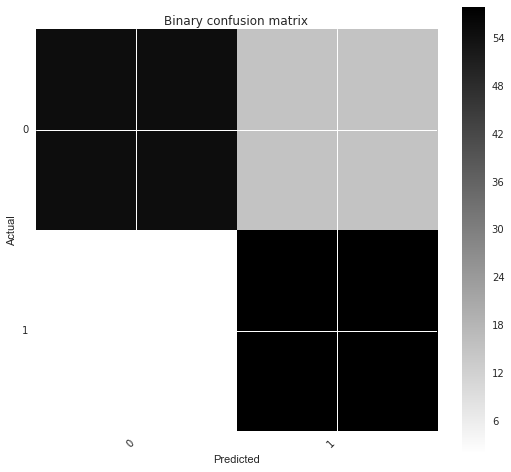

population: 130
P: 60
N: 70
PositiveTest: 73
NegativeTest: 57
TP: 58
TN: 55
FP: 15
FN: 2
TPR: 0.966666666667
TNR: 0.785714285714
PPV: 0.794520547945
NPV: 0.964912280702
FPR: 0.214285714286
FDR: 0.205479452055
FNR: 0.0333333333333
ACC: 0.869230769231
F1_score: 0.872180451128
MCC: 0.755898667076
informedness: 0.752380952381
markedness: 0.759432828647
prevalence: 0.461538461538
LRP: 4.51111111111
LRN: 0.0424242424242
DOR: 106.333333333
FOR: 0.0350877192982


In [77]:
def LogReg(modelwparams, X_train, X_test, y_train, y_test):
    
    '''You need to pass this function the LogReg model with the parameters you choose,
    as well as all your data (train/test X's and Y)
    
    make sure your X and y's are arrays'''
    
    LOG = modelwparams
    logit_fit_model = LOG.fit(X_train, y_train)
    pred_y = logit_fit_model.predict(X_test)
    
    cm = ConfusionMatrix(y_test, pred_y)
    print cm
    cm.plot()
    plt.show()
    cm.print_stats()

LogReg(LOGIT, X_train, X_test, y_train, y_test)

TPR = True Positive Rate <br>
TNR = True Negative Rate <br>
ACC = Average per class Accuracy <br>
So we see from the stats that the accuracy for: <br>
mpg01 = 0 class --> 78.57% <br>
mpg-1 = 1 class --> 96.67% <br>
avg per class acuuracy --> 86.92% <br>

### 4)

Predicted   0   1  __all__
Actual                    
0          54  16       70
1           0  60       60
__all__    54  76      130


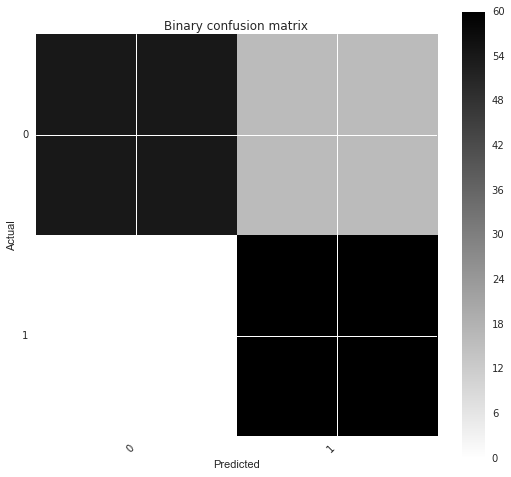

population: 130
P: 60
N: 70
PositiveTest: 76
NegativeTest: 54
TP: 60
TN: 54
FP: 16
FN: 0
TPR: 1.0
TNR: 0.771428571429
PPV: 0.789473684211
NPV: 1.0
FPR: 0.228571428571
FDR: 0.210526315789
FNR: 0.0
ACC: 0.876923076923
F1_score: 0.882352941176
MCC: 0.780398972572
informedness: 0.771428571429
markedness: 0.789473684211
prevalence: 0.461538461538
LRP: 4.375
LRN: 0.0
DOR: inf
FOR: 0.0


In [78]:
Cs = [0.001,0.01, 0.1, 1, 10 ,100, 1000]
LOGITCV = LogisticRegressionCV(Cs = Cs, cv = 5)
LogReg(LOGITCV, X_train, X_test, y_train, y_test)

TPR = True Positive Rate <br>
TNR = True Negative Rate <br>
ACC = Average per class Accuracy <br>
So we see from the stats that the accuracy for: <br>
mpg01 = 0 class --> 77.14% <br>
mpg-1 = 1 class --> 100% <br>
avg per class accuracy --> 87.69% <br>
We see that the avg per class slightly improved from part 3

### 5) 

Predicted   0   1  __all__
Actual                    
0          56  14       70
1           1  59       60
__all__    57  73      130


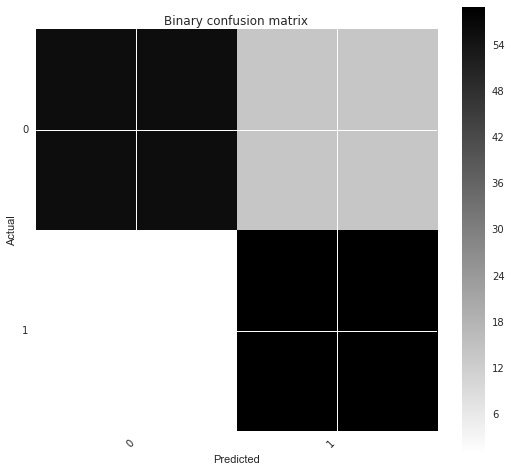

population: 130
P: 60
N: 70
PositiveTest: 73
NegativeTest: 57
TP: 59
TN: 56
FP: 14
FN: 1
TPR: 0.983333333333
TNR: 0.8
PPV: 0.808219178082
NPV: 0.982456140351
FPR: 0.2
FDR: 0.191780821918
FNR: 0.0166666666667
ACC: 0.884615384615
F1_score: 0.887218045113
MCC: 0.786995764139
informedness: 0.783333333333
markedness: 0.790675318433
prevalence: 0.461538461538
LRP: 4.91666666667
LRN: 0.0208333333333
DOR: 236.0
FOR: 0.0175438596491
Predicted   0   1  __all__
Actual                    
0          56  14       70
1           0  60       60
__all__    56  74      130


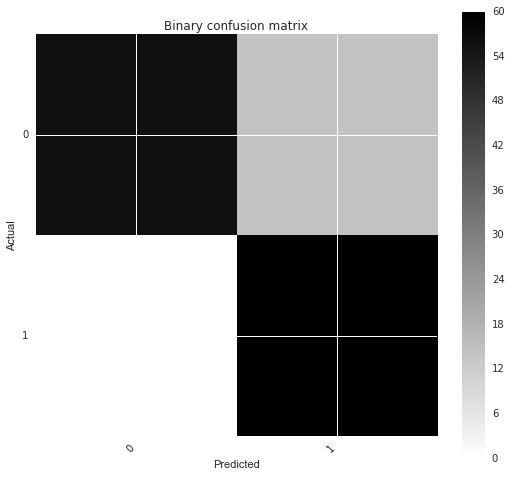

population: 130
P: 60
N: 70
PositiveTest: 74
NegativeTest: 56
TP: 60
TN: 56
FP: 14
FN: 0
TPR: 1.0
TNR: 0.8
PPV: 0.810810810811
NPV: 1.0
FPR: 0.2
FDR: 0.189189189189
FNR: 0.0
ACC: 0.892307692308
F1_score: 0.89552238806
MCC: 0.805387266257
informedness: 0.8
markedness: 0.810810810811
prevalence: 0.461538461538
LRP: 5.0
LRN: 0.0
DOR: inf
FOR: 0.0


In [79]:
Cs = [0.001,0.01, 0.1, 1, 10 ,100, 1000]
#need to use liblinear solver because lbfgs only supports l2 penalty
LOGITCV2 = LogisticRegressionCV(Cs = Cs, penalty = 'l1', solver ='liblinear', cv = 5)
LogReg(LOGITCV2, X_train, X_test, y_train, y_test)

#here is #5 again but with stratifiedkfold method (its the default cv mehtod for logisticregressionCV)
LOGITCV3 = LogisticRegressionCV(Cs = Cs, penalty = 'l1', solver ='liblinear')
LogReg(LOGITCV3, X_train, X_test, y_train, y_test)

So we see from the stats that the accuracy for: <br>
mpg01 = 0 class --> 80% <br>
mpg-1 = 1 class --> 98.3333% <br>
avg per class accuracy --> 88.46% <br>
We see that the avg per class slightly improved from parts 3 & 4 <br>
and with stratified K fold we even get to an avg per class accuracy of 89.23% <br>

### 6)

The last model does the best. It seems that they are predicting on the high mileage side by which I mean they are making more predictions for the mpg01 = 1 class and so pretty much all the false negatives are dropping out. <br> <br>
The best accuracy we get is by running LogisticRegression CV with stratified K fold cross validation, l1 penalty and liblinear solver. The stratified K fold increases accuracy over normal cross validation by itself because it creates folds with equal numbers of both classes. The difference between the 2 regularization penalties l2 and l1 is so small it's hard to generalize as this is a small sample size but in this example l1 penalty slightly outperformed l2 in avg per class accuracy

# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Read in data

In [81]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [82]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
# Concat all data together to perform same data transformations
all_data = pd.concat((train_df.loc[:,'MSSubClass':'SaleCondition'],
                      test_df.loc[:,'MSSubClass':'SaleCondition']))

We just looked at some basic plots of the data to get a sense of how it is distributed and what transformations we might make.

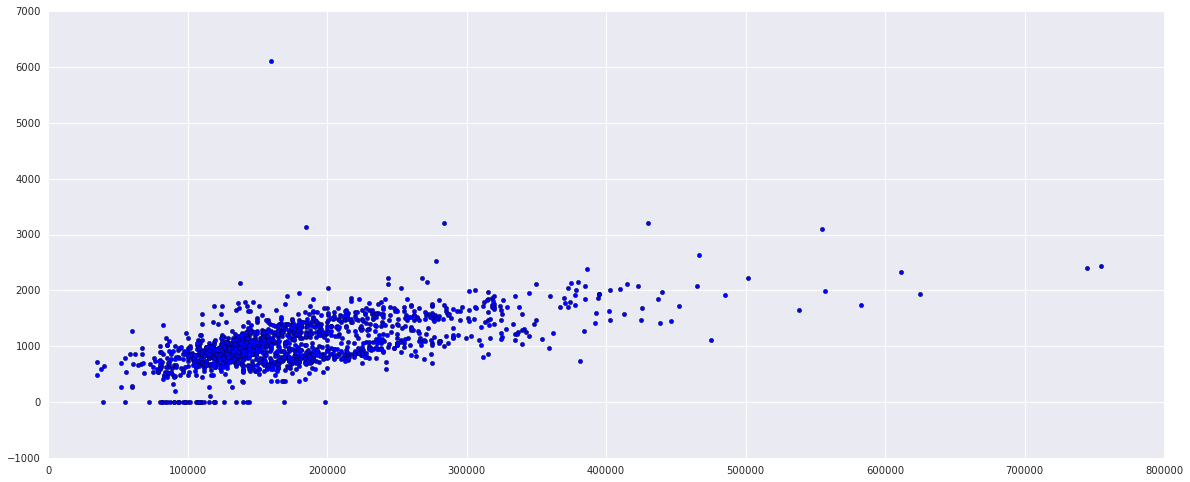

In [96]:
plt.figure(figsize=(20,8))
plt.xlim(0, 800000)
plt.ylim(-1000, 7000)
plt.scatter(train_df['SalePrice'], train_df['TotalBsmtSF'])

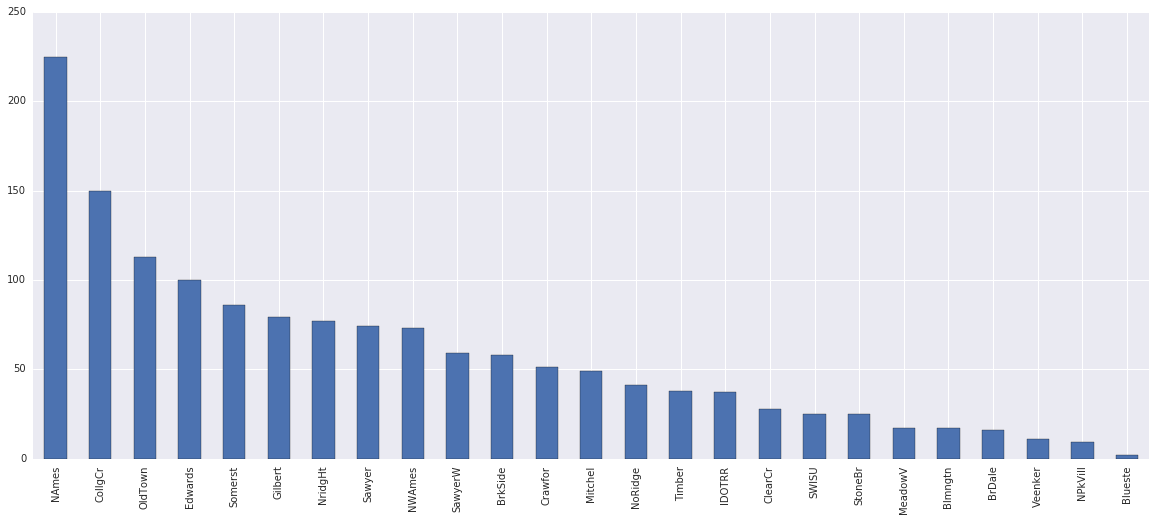

In [97]:
plt.figure(figsize=(20,8))
train_df['Neighborhood'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AAAAC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A262C50>]], dtype=object)

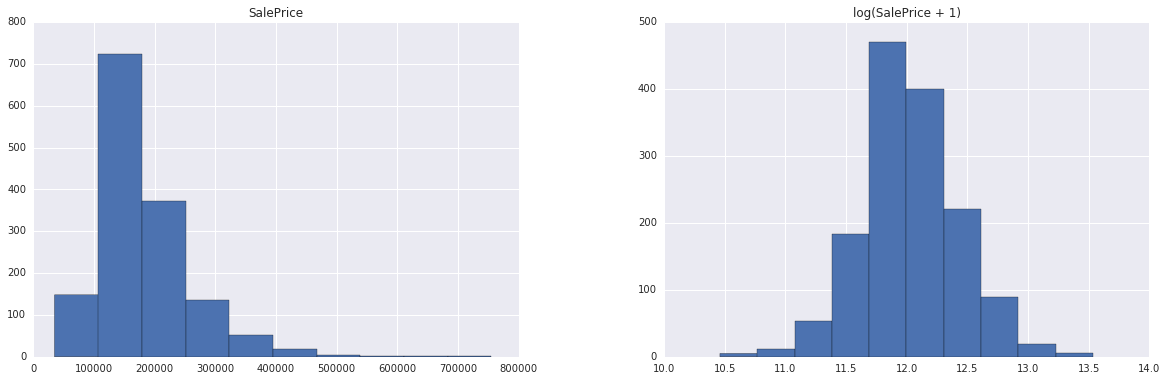

In [99]:
# Plot distribution of SalePrice vs the log of SalePrice
# We see that taking the log normalizes SalePrice
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"SalePrice":train_df["SalePrice"], "log(SalePrice + 1)":np.log1p(train_df["SalePrice"])})
plt.figure(figsize(20,6))
prices.hist()

### Data Preprocessing

In [100]:
#log transform the target:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [101]:
# Dummy code categorical variables
all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

### Training and Test Sets

In [102]:
#creating matrices for sklearn:
X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
y = train_df.SalePrice

### Linear Regression

In [103]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [104]:
#Split the original training set up to perform cross validation
LRx_train, LRx_test, LRy_train, LRy_test = train_test_split(X_train, y, test_size = 0.3, random_state = 10)

In [105]:
# Set up matrix for correlation
LRx_train_corr = LRx_train.copy(deep=True)
LRx_train_corr['SalePrice'] = y

In [106]:
# Find the correlations of all variables to SalePrice
corr = LRx_train_corr.corr()
corr['SalePrice'].sort_values(ascending = False)

SalePrice               1.000000
OverallQual             0.817686
GrLivArea               0.719584
GarageCars              0.675443
GarageArea              0.655853
1stFlrSF                0.599994
FullBath                0.593199
YearBuilt               0.586558
YearRemodAdd            0.557194
Foundation_PConc        0.545957
TotRmsAbvGrd            0.530530
ExterQual_Gd            0.518072
GarageYrBlt             0.511039
Fireplaces              0.476097
BsmtQual_Ex             0.473161
HeatingQC_Ex            0.472045
OpenPorchSF             0.470773
KitchenQual_Ex          0.434945
BsmtFinType1_GLQ        0.427292
GarageFinish_Fin        0.421433
LotArea                 0.414270
GarageType_Attchd       0.401183
MasVnrArea              0.400805
KitchenQual_Gd          0.386592
TotalBsmtSF             0.371356
LotFrontage             0.370071
Neighborhood_NridgHt    0.365465
ExterQual_Ex            0.360525
FireplaceQu_Gd          0.358813
WoodDeckSF              0.358409
          

In [107]:
# Extract top features via correlations
# The top feature was overall quality which is common sense mostly becuase people will pay more for a nicer home
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'FullBath']

LRx_train = LRx_train[features]
LRx_test = LRx_test[features]

model = LinearRegression()
results = model.fit(LRx_train, LRy_train)

Y_pred = model.predict(LRx_test)

In [108]:
mean_squared_error(LRy_test, Y_pred)**0.5

0.18003700749681475

### Lasso and Ridge Regression

In [109]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [110]:
model_ridge = Ridge()

In [111]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

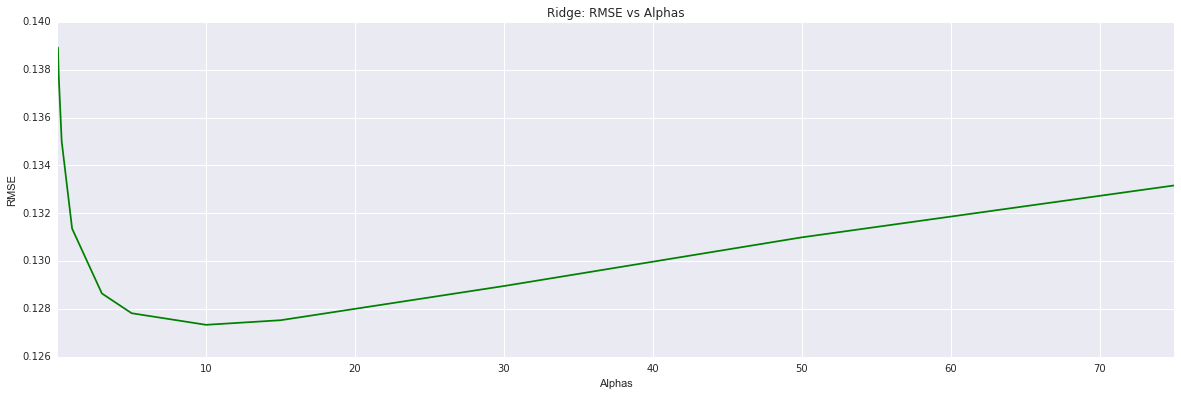

In [112]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge: RMSE vs Alphas", color = 'green')
plt.xlabel("Alphas")
plt.ylabel("RMSE")

The RMSE of ridge regression performs better than normal linear regression but lasso regression outperforms both of them slightly.

In [113]:
cv_ridge.min()

0.12733734668670779

In [114]:
model_lasso = LassoCV(alphas = [1, 0.5, 0.1, 0.05, 0.001, 0.0005]).fit(X_train, y)

In [115]:
rmse_cv(model_lasso).mean()

0.12314421090977434

(0, 0.3)

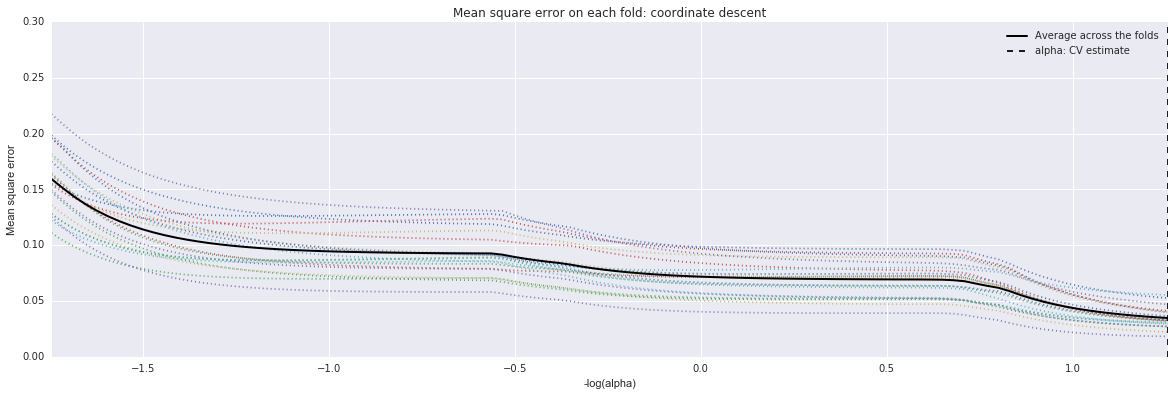

In [116]:
model = LassoCV(cv=20).fit(X_train, y)


# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 0, .3
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
plt.ylim(ymin, ymax)

### Multilayer Perceptron

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline

We are splitting the training set again but keeping the random state the same as above in order to prevent any funkiness that might have occurred. 

In [118]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y, test_size = 0.33, random_state=10)

In [119]:
#first we scale our x variables
X_scaler = StandardScaler()
X_train2 = X_scaler.fit_transform(X_train2)
X_test2 = X_scaler.transform(X_test2)
MLPA = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (2,), solver ='sgd', learning_rate = 'constant', random_state = 42, batch_size = 40, 
                  learning_rate_init = 0.001)
MLPB = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (15,), solver ='sgd', learning_rate = 'constant', random_state = 42, batch_size = 40, 
                  learning_rate_init = 0.001)
mse = make_scorer(mean_squared_error)

In [120]:
#A
score = cross_val_score(MLPA, X_train2, y_train2, cv = 5, scoring = mse)
print 'rmse A:', np.sqrt(score)
M = sum(np.sqrt(score))
print "AVG RMSE A:", M/5

#B
score = cross_val_score(MLPB, X_train2, y_train2, cv = 5, scoring = mse)
print 'rmse B:', np.sqrt(score)
M = sum(np.sqrt(score))
print "AVG RMSE B:", M/5

C:\Users\zack_\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


rmse A: [ 1.07070707  0.82474093  0.71074569  0.86079358  1.54400963]
AVG RMSE A: 1.00219938175
rmse B: [ 1.64400995  1.47491543  1.44376114  1.47398326  2.05787698]
AVG RMSE B: 1.61890935122


In [121]:
#getting training RMSe
trainmodelA = MLPA.fit(X_train2, y_train2)
trainmodelB = MLPB.fit(X_train2, y_train2)
pred_Ya = trainmodelA.predict(X_train2)
pred_Yb = trainmodelB.predict(X_train2)
scoreA = mean_squared_error(y_train2, pred_Ya)
scoreB = mean_squared_error(y_train2, pred_Yb)
print 'RMSE on training data for part A:', np.sqrt(scoreA)
print 'RMSE on training data for part B:', np.sqrt(scoreB)

#getting testing RMSE
testmodelA = MLPA.fit(X_train2, y_train2)
testmodelB = MLPB.fit(X_train2, y_train2)
pred_Ya = trainmodelA.predict(X_test2)
pred_Yb = trainmodelB.predict(X_test2)
scoreA = mean_squared_error(y_test2, pred_Ya)
scoreB = mean_squared_error(y_test2, pred_Yb)
print 'RMSE on test data for part A:', np.sqrt(scoreA)
print 'RMSE on test data for part B:', np.sqrt(scoreB)

RMSE on training data for part A: 0.338154452939
RMSE on training data for part B: 0.113225078866
RMSE on test data for part A: 0.245454422399
RMSE on test data for part B: 0.794675936376


We see that the RMSE is much better for model B but for some reason that model performs way worse on the test data so we stuck with lasso regression for our final model.

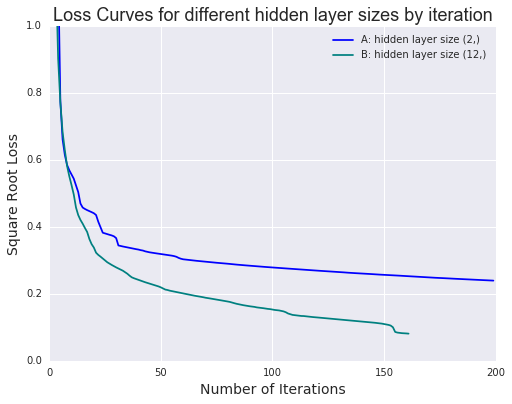

In [122]:
import seaborn

Acurve = np.sqrt(testmodelA.loss_curve_)
Bcurve = np.sqrt(testmodelB.loss_curve_)

plt.figure(figsize=(8,6))

ymin, ymax = 0, 1
plt.plot(Acurve, color='blue', label = 'A: hidden layer size (2,)')
plt.plot(Bcurve, color='teal', label = 'B: hidden layer size (12,)')
plt.ylabel('Square Root Loss', fontsize = 14)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.title('Loss Curves for different hidden layer sizes by iteration', fontsize = 18)
plt.legend(loc='upper right')
plt.ylim(ymin, ymax)
plt.show()

### Submission for Kaggle
#### Team Name: Davis_Zack_APM

In [123]:
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [124]:
solution = pd.DataFrame({"Id":test_df.Id, "SalePrice":lasso_preds})
solution.to_csv("lasso_sol.csv", index = False)

<img src="Kaggle.png">